# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [48]:
import pandas as pd
import numpy as np

In [49]:
# Your code here
boston = pd.read_csv('../data/boston_data.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [50]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

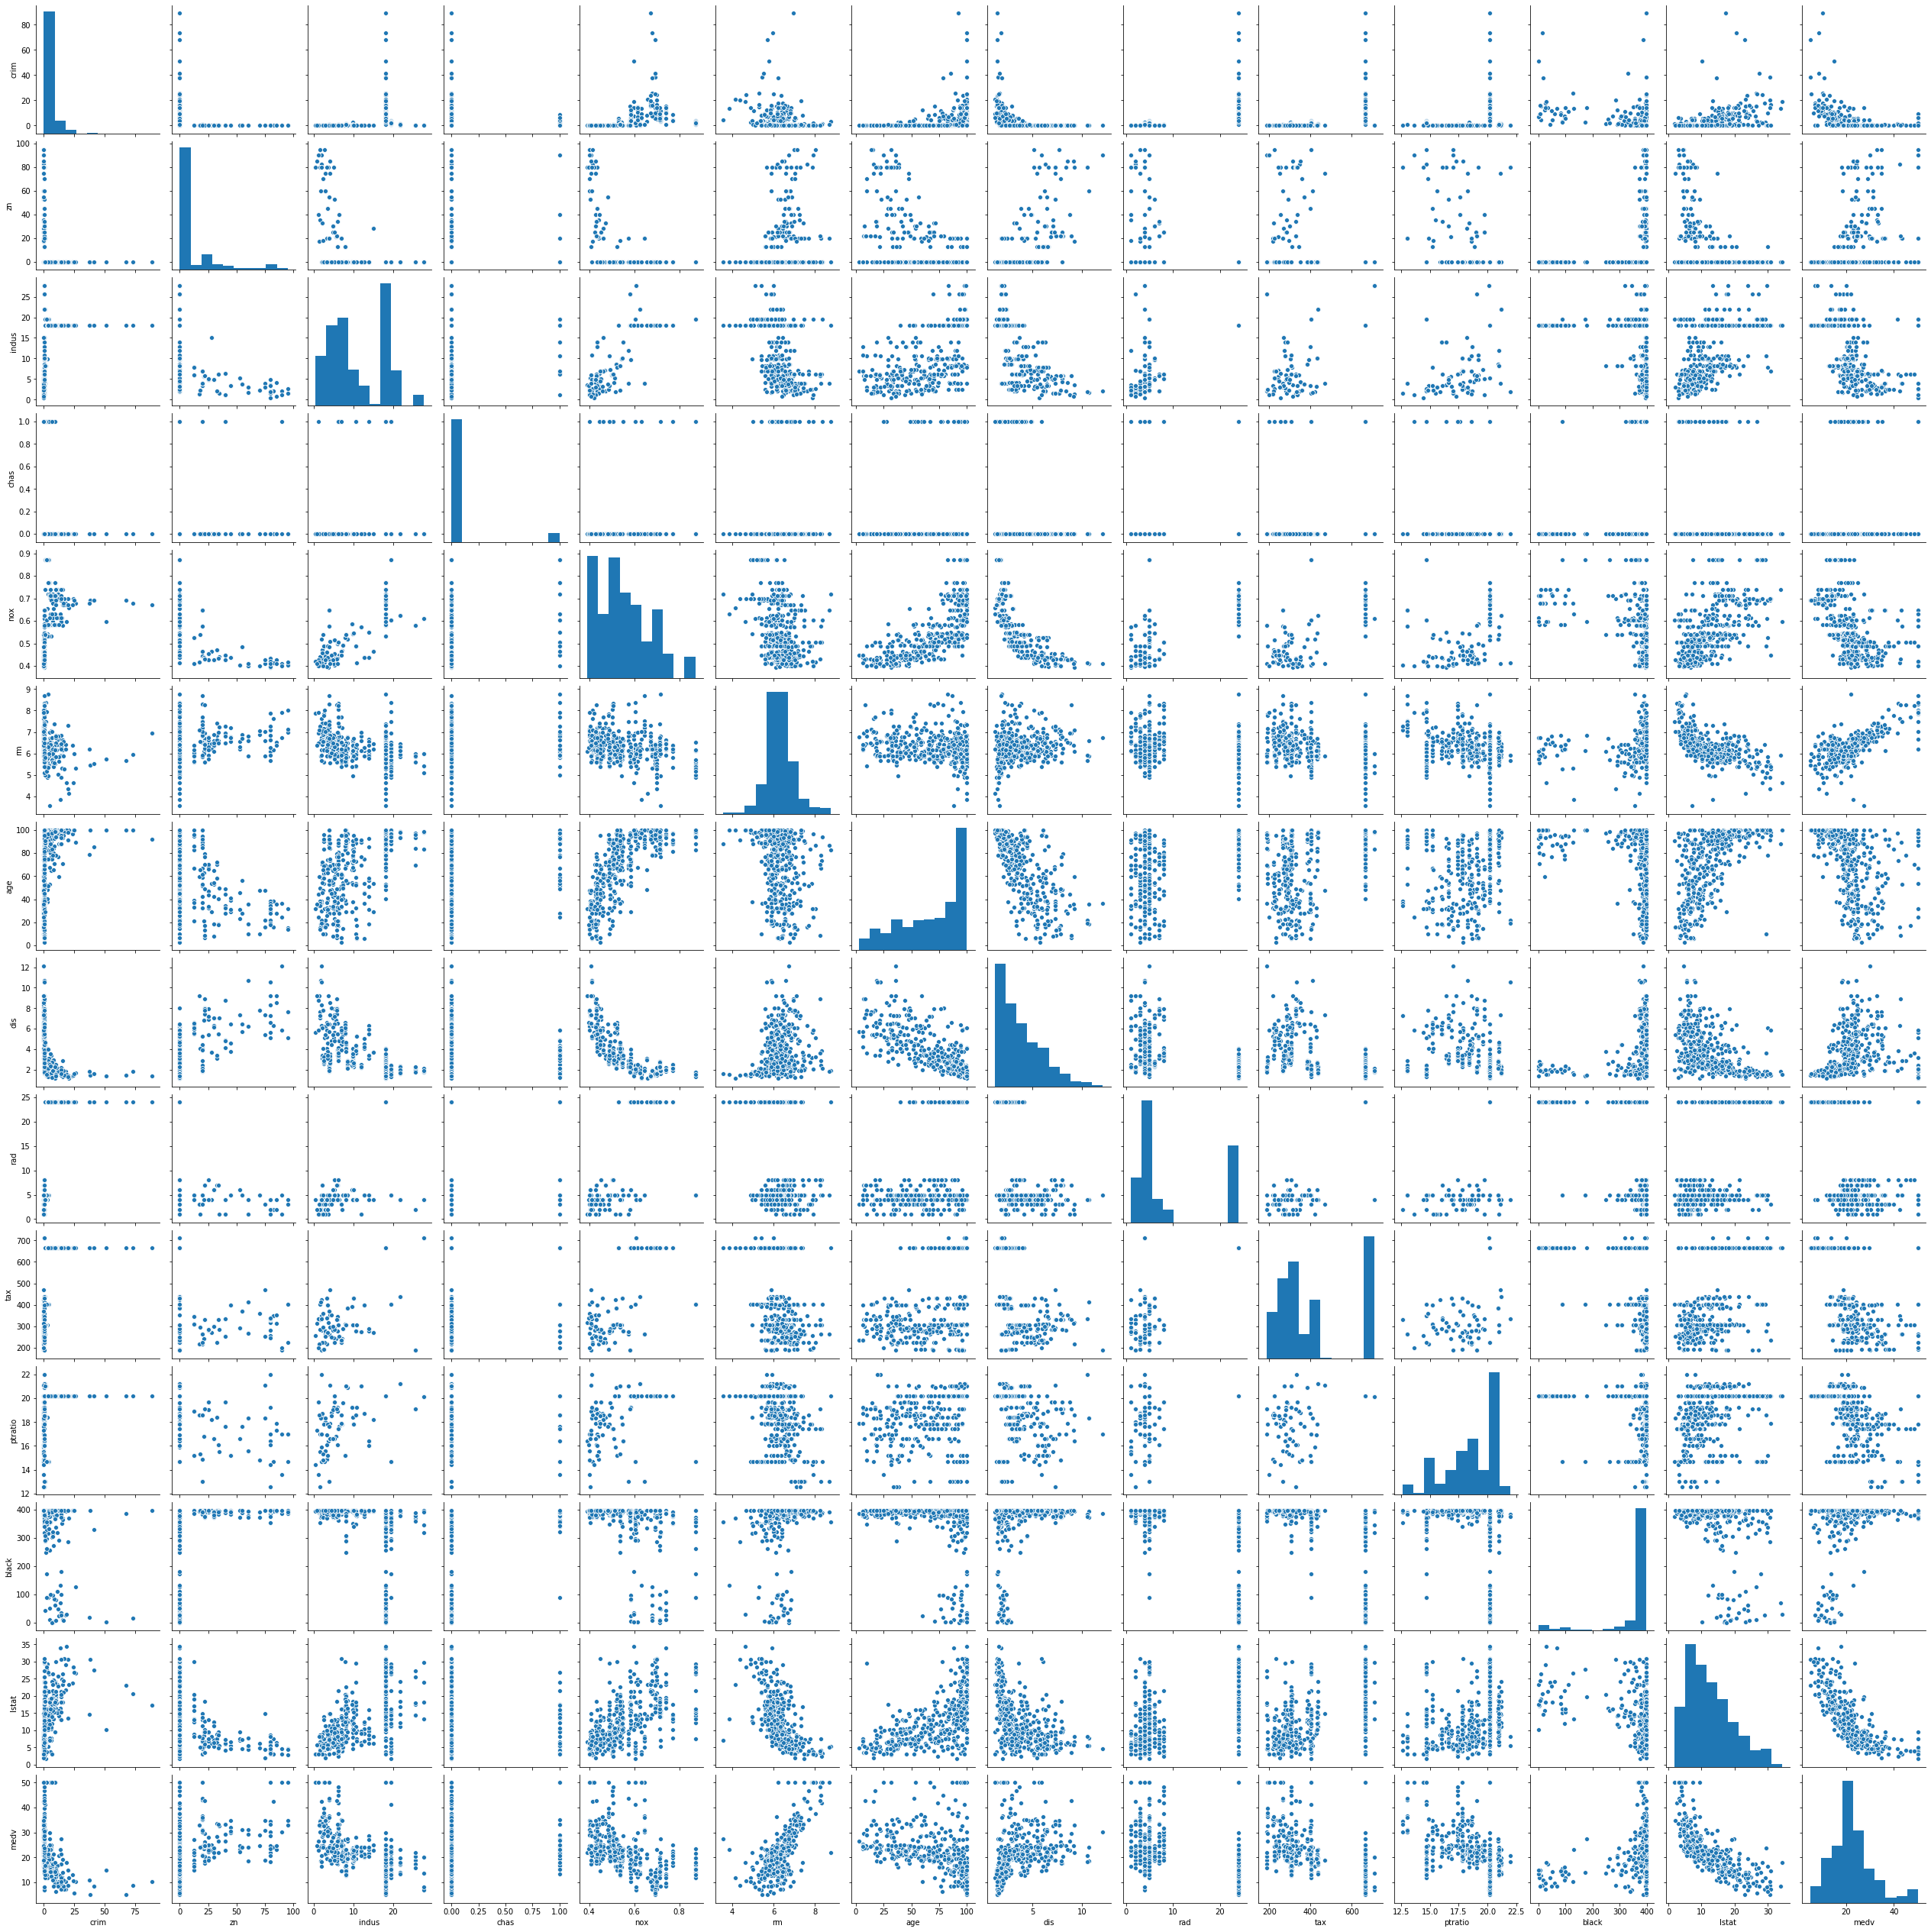

In [63]:
# Your plots here
import seaborn as sns
sns.pairplot(boston)

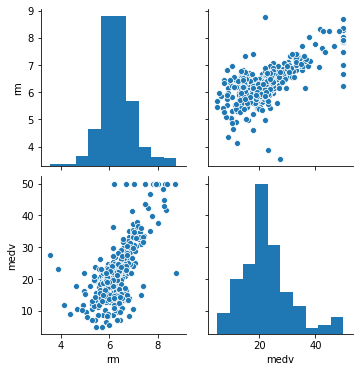

In [65]:
sns.pairplot(boston[['rm','medv']])

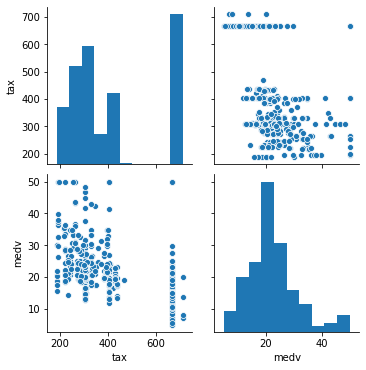

In [66]:
sns.pairplot(boston[['tax','medv']])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [52]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [53]:
# Your response here

features = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']].copy()

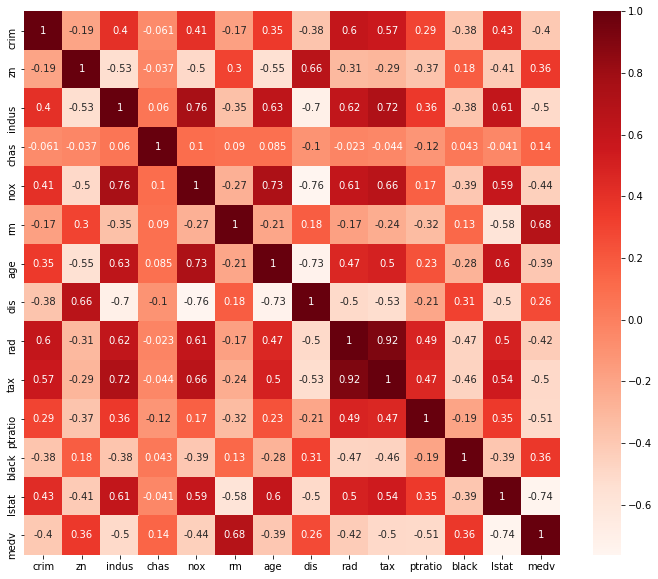

In [54]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [55]:
# Your code here
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [56]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_pred)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [57]:
# Your code here
from sklearn.model_selection import train_test_split
X = boston.drop(columns="medv")
y = boston["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=8)



----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [82]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
regr2 = RandomForestRegressor(max_depth=2, random_state=0)
regr2.fit(X, y)
Y_pred2= regr2.predict(X_test)
print(Y_pred2)

[21.98479808 32.30348745 30.40083188 23.72847166 25.76842811 32.96459535
 22.66499761 16.42512177 16.12154713 24.62701745 23.72847166 20.48435217
 32.02478323 16.79185053 25.84792671 15.49632218 33.34347008 23.24945417
 21.01971679 23.26133954 24.72499753 21.33603871 24.62701745 24.62701745
 14.46864715 25.0920719  21.05247558 25.82269355 23.82645174 24.62701745
 14.04394767 18.8717267  25.00230062 24.99551374 42.84217062 21.61091225
 15.27596292 23.72847166 21.61091225 26.66505553 20.59228181 24.62701745
 23.72847166 24.64038646 21.69703496 21.61091225 24.72499753 21.61091225
 21.61091225 19.31351772 40.27795669 21.05247558 15.0366333  22.04791467
 14.57042482 24.8635247  25.60888381 21.61091225 14.04394767 16.12154713
 21.61091225 34.534764   26.95470205 15.1288615  33.17332408 25.69126048
 21.61091225 21.61091225 16.12154713 26.38852572 21.98479808 25.00230062
 15.49632218 25.00230062 16.87679791 23.26133954 15.04280224 24.62701745
 23.72847166 21.90283936 42.90409947]


In [83]:
regr4 = RandomForestRegressor(max_depth=4, random_state=0)
regr4.fit(X, y)
Y_pred4= regr4.predict(X_test)

print(Y_pred4)

[20.94448369 33.68372848 31.91896268 22.99028809 28.89972067 32.58768187
 21.42764389 19.6082354  17.18645401 23.41671873 22.27369942 19.97165442
 30.34403109 17.52976556 28.29651006 15.0147913  32.60039733 25.31443509
 20.51524864 22.44854568 26.34181918 19.96191948 23.46527031 23.11720996
 14.09421533 24.21950312 20.7694998  28.19637809 24.79733585 23.80416669
  9.80946891 18.7761261  26.65311253 24.46656312 44.68239764 20.70546104
 14.46808209 22.62116349 20.98427658 28.31437346 20.26652098 23.44742998
 22.92829412 26.21026776 20.87012628 22.94439459 26.23085494 20.86833112
 20.90979    15.44038937 38.75293186 20.6375953  14.7560438  21.24158648
 13.41098627 26.25448528 27.59245988 20.79648293 10.27540016 18.85942191
 21.02146713 33.98905678 28.94979413 12.92561771 33.27812513 27.09954778
 20.86525157 21.03122086 18.59907949 25.64535085 21.15334085 27.00382632
 15.3447094  26.73951991 20.01590902 22.08167238 12.02867649 23.77483617
 22.67852361 21.35225394 44.21110096]


In [84]:
regr6 = RandomForestRegressor(max_depth=6, random_state=0)
regr6.fit(X, y)
Y_pred6= regr6.predict(X_test)
print(Y_pred6)

[20.44751504 35.32172831 33.64649269 23.44731259 29.80157539 32.97464271
 21.01552221 23.82723234 16.58918676 23.84875646 21.42075544 19.80490534
 28.27904718 17.76828829 29.53443045 14.63292977 31.59297259 25.88881168
 20.59996886 22.45271869 26.15805182 19.04401834 24.02405565 22.86360007
 14.79341122 24.4353712  20.6324744  29.60457601 24.47501216 24.72241499
  8.09898147 18.49995003 26.95850995 26.23192161 43.49772871 19.71152561
 14.20591532 21.87192382 20.84996306 27.27001039 20.3020687  23.56399467
 22.97982196 26.60265049 20.09068018 26.26021797 25.78431214 20.43246842
 20.78258063 14.08361501 37.60960414 20.79955082 14.93003369 20.78462564
 13.98882507 26.23064712 29.12339483 20.24056557 10.91518903 18.94027541
 20.83669554 34.29764518 29.81577857  9.78315309 33.34672874 28.88862713
 20.55600246 20.50934125 18.89960984 26.26730267 20.94090812 28.09780356
 15.53426375 26.33368525 21.1407717  21.25501849 12.04089629 24.12145868
 22.71133658 21.67779894 42.95871786]


In [86]:
regr8 = RandomForestRegressor(max_depth=8, random_state=0)
regr8.fit(X, y)
Y_pred8= regr8.predict(X_test)
print(Y_pred8)

[19.71424741 35.8097871  34.30010972 24.47124515 30.60902079 33.19882571
 21.02322243 24.49909524 16.08671464 24.22359008 21.31268854 20.02656111
 27.31683961 17.40220096 29.69757808 14.39337443 30.86067671 26.59444607
 20.63328748 22.91709299 26.05367024 18.25698529 24.28586256 22.48836792
 15.15279783 24.53183595 20.86688672 30.00118961 23.87068082 25.89748646
  7.44717337 18.07526583 27.4929241  26.87604611 43.34674286 18.55260689
 14.0830331  21.31037572 20.92895222 26.58059652 20.20276995 23.51687999
 23.01578107 27.62594738 19.18842409 27.49881053 24.88969453 20.24624608
 20.92206494 13.95639174 37.5432463  20.80582367 14.94347834 20.70089569
 14.01719787 26.35089547 29.55815017 19.65903699 11.45598032 19.03524973
 20.93725099 34.61846755 29.65115019  8.8461654  33.29770099 30.04784043
 20.5155695  19.68237536 18.84558766 27.19748611 21.15065717 29.29880078
 15.62619964 25.32200331 21.81443969 21.65013366 12.08845382 24.23948825
 23.0877885  22.30272672 42.811     ]


In [ ]:
regr10 = RandomForestRegressor(max_depth=10, random_state=0)
regr10.fit(X, y)
Y_pred10= regr10.predict(X_test)

print(Y_pred10)

Now, plot the score for each tree on the training set and on the testing set.

In [73]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [77]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[ 97  79  30 157 115 141 110  62  81  54 124  74  80 125  72  53 107 166
  24 111   0 112 104  15 136  58  87 111  33  80  76  79  32 131 146  68
 113  57  68  74 102  26 177  69 119 158  87  21 107  78  79  57 100 176
 127  66  99  45  86  96  46 101 136 119 105 120  37 105  16  39 136  20
  86  78  71 115  88  29   3  89 159 126  76 132 151  84 177 158   0   3
  74 110  28  43 138 177 153  22  75  66  92  63 167  47 177  90  72  72
  80   3  65 116   6  39  70 177 126  30  66  43 142 135 106 108  15  80
  64 117 123  44  88  93 129  70   1  70 137  50  86 102   6  92  64  76
  52 143 162  98 109 140 118 125  62  90 156 115 117  61 162 108 134 161
 104 117  99 163  62  34 127  12  11  28  51 114 126  36  10  91 171  40
 155  41  82 154 116 110  97  19   5  86  48  20 110  13 174 177  92  23
  99  67  93  12 133   7  92 175  12  74  99 147  43   8 144  30 110 122
  96 128 111  18 119 159   2  70  25 152 115  82 118 162   8  76 103  59
 127 168 177  83 130 109 177  85  73 126  83  35  9

In [81]:
y_train.shape

(323,)

In [80]:
X_train.shape

(323, 13)

In [79]:
lab_enc = preprocessing.LabelEncoder()
training_X_encoded = lab_enc.fit_transform(X_train)
print(training_X_encoded)
print(utils.multiclass.type_of_target(X_train))
print(utils.multiclass.type_of_target(X_train.astype('int')))
print(utils.multiclass.type_of_target(training_X_encoded))

ValueError: y should be a 1d array, got an array of shape (323, 13) instead.

In [76]:
# Produce a plot with the score for the testing and training for the different max depths
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here